In [159]:
import pandas as pd

In [161]:
import numpy as np
from  sklearn.preprocessing import LabelEncoder

In [163]:
df= pd.read_csv('laptop_project2.csv')

In [165]:
df.columns

Index(['price', 'Brand', 'Processor', 'Generation', 'RAM', 'ROM',
       'Graphic Card'],
      dtype='object')

In [167]:
df.drop('Generation' , axis = 1 , inplace = True)

In [171]:
df.head()

,price,Brand,Processor,RAM,ROM,Graphic Card
0,37999,HP,Intel Core i3,8 GB,512 GB SSD,0
1,44500,Acer,Intel Core i5,12 GB,512 GB SSD,0
2,69900,ASUS,Intel Core i5,16 GB,512 GB SSD,0
3,9990,HP,MediaTek MT8183,4 GB,32 GB EMMC,0
4,10990,Primebook,MediaTek MT8183,4 GB,64 GB EMMC,0


In [173]:
df.Processor.value_counts()

Processor
Intel Core i5                   177
Intel Core i3                    96
Ryzen 5                          90
Intel Core i7                    59
AMD Ryzen 7                      33
Ryzen 3                          33
Intel Core Ultra                 19
Intel Celeron Dual Core          18
Intel Core i9                    11
Intel Core 5                      4
Ryzen 9                           3
Apple Silicon                     3
Intel Celeron Quad Core           3
AMD Athlon                        3
MediaTek MT8183                   3
Intel Core N N100                 2
AMD Dual Core A3020               1
Qualcomm                          1
AMD Ryzen AI 9                    1
Intel Pentium Gold 7505           1
AMD Ryzen Z1                      1
MediaTek Kompanio 1200            1
Qualcomm Snapdragon 7c Gen 2      1
Qualcomm Snapdragon X Elite       1
Intel Dual Core N4020             1
Intel Core N N200                 1
Name: count, dtype: int64

In [179]:
df['RAM'] = df['RAM'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int) 
df['ROM'] = df['ROM'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

In [193]:
df.tail(9)

,price,Brand,Processor,RAM,ROM,Graphic Card
558,105890,Lenovo,Intel Core i7,24,512,8 GB Graphics/NVIDIA GeForce RTX
559,54990,HP,Ryzen 5,8,512,0
560,82190,Lenovo,AMD Ryzen 7,24,512,6 GB Graphics/NVIDIA GeForce RTX
561,44990,Lenovo,Ryzen 5,8,512,0
562,64990,Infinix,Intel Core Ultra,16,512,0
563,76990,Lenovo,Intel Core i5,16,1,0
564,73990,DELL,Intel Core i5,16,512,6 GB Graphics/NVIDIA GeForce RTX GEFORCE RTX
565,74890,DELL,Intel Core i5,16,512,6 GB Graphics/NVIDIA GeForce RTX
566,44890,HP,Intel Core i3,8,512,0


In [11]:
import category_encoders as ce
label_encoders = {}
a = list(df.columns)
a.remove('price')
for col in a:
    target_enc = ce.TargetEncoder(cols=[col]) 
    df[col] = target_enc.fit_transform(df[col], df['price'])
    label_encoders[col] = target_enc

In [13]:
a

['Brand', 'Processor', 'RAM', 'ROM', 'Graphic Card']

In [14]:
df.head()

,price,Brand,Processor,RAM,ROM,Graphic Card
0,37999,54661.313941,37393.871667,42380.738008,53518.333333,49620.229314
1,44500,55880.090155,59244.633062,60567.851602,53518.333333,49620.229314
2,69900,64369.724320,59244.633062,76843.991998,53518.333333,49620.229314
3,9990,54661.313941,53374.404207,41138.365520,54518.208395,49620.229314
4,10990,54058.977022,53374.404207,41138.365520,53195.382099,49620.229314


In [15]:
label_encoders

{'Brand': TargetEncoder(cols=['Brand']),
 'Processor': TargetEncoder(cols=['Processor']),
 'RAM': TargetEncoder(cols=['RAM']),
 'ROM': TargetEncoder(cols=['ROM']),
 'Graphic Card': TargetEncoder(cols=['Graphic Card'])}

In [16]:
df.head()

,price,Brand,Processor,RAM,ROM,Graphic Card
0,37999,54661.313941,37393.871667,42380.738008,53518.333333,49620.229314
1,44500,55880.090155,59244.633062,60567.851602,53518.333333,49620.229314
2,69900,64369.724320,59244.633062,76843.991998,53518.333333,49620.229314
3,9990,54661.313941,53374.404207,41138.365520,54518.208395,49620.229314
4,10990,54058.977022,53374.404207,41138.365520,53195.382099,49620.229314


In [17]:
y = df['price']
x = df.drop('price' , axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [20]:
x_train.head()

,Brand,Processor,RAM,ROM,Graphic Card
117,87874.947476,59244.633062,76843.991998,100987.823239,64664.075182
211,64369.724320,59244.633062,42380.738008,53518.333333,63436.220086
0,54661.313941,37393.871667,42380.738008,53518.333333,49620.229314
328,63670.109043,97314.930901,66762.963879,53518.333333,93677.275894
11,54661.313941,37829.677662,42380.738008,53518.333333,49620.229314


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model1 = RandomForestRegressor(n_estimators=666, random_state=0)

model1.fit(x_train , y_train)

In [24]:
model1.fit(x_train , y_train)

RandomForestRegressor(n_estimators=666, random_state=0)

In [25]:
y_pred = model1.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(y_test , y_pred)

11614.415412225033

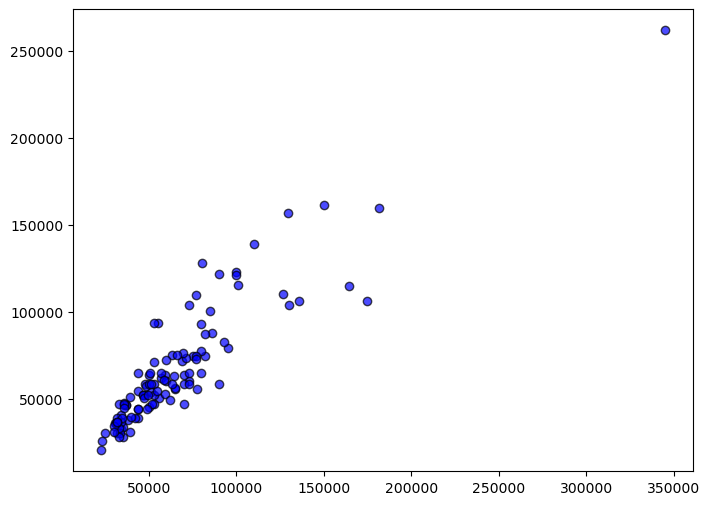

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')

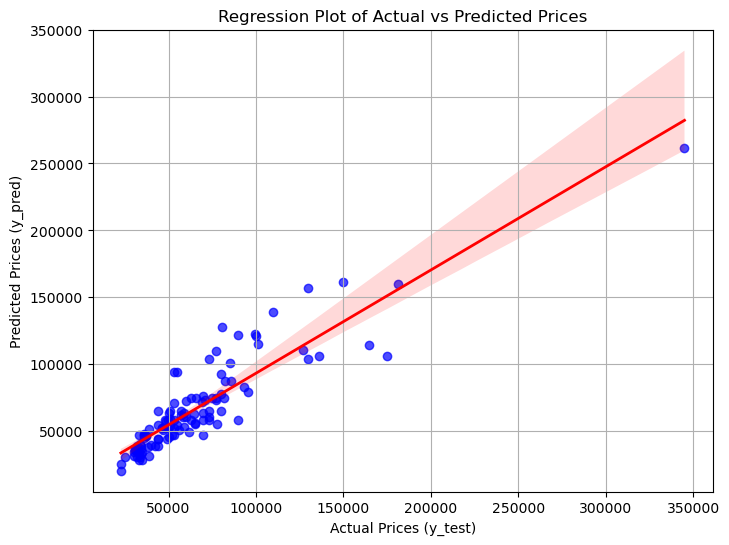

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test to a DataFrame for alignment
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 313060364.47748107
Mean Absolute Error: 11614.415412225033
R-squared Score: 0.812195863997591


In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

In [32]:
model.fit(x_train , y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
y_pred = model.predict(x_test )

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 489876369.43621826
Mean Absolute Error: 13265.747211679518
R-squared Score: 0.7061243812722142


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model2.fit(x_train , y_train)

GradientBoostingRegressor(random_state=42)

In [36]:
y_pred = model2.predict(x_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 205460225.54016432
Mean Absolute Error: 9593.916829662865
R-squared Score: 0.8767449204090918


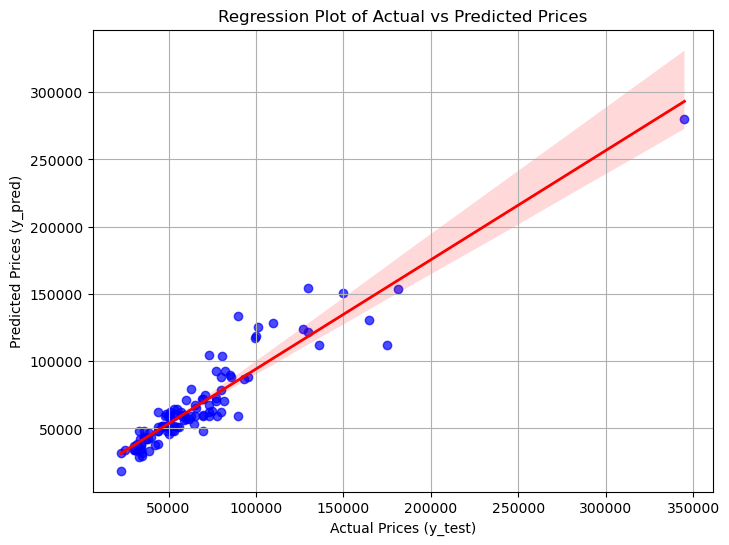

In [38]:
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()


In [39]:
from sklearn.svm import SVR

In [40]:
model3 = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [41]:
model3.fit(x_train , y_train )

SVR()

In [42]:
y_pred = model3.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 1870721634.1040218
Mean Absolute Error: 24749.426738401547
R-squared Score: -0.12224126736807706


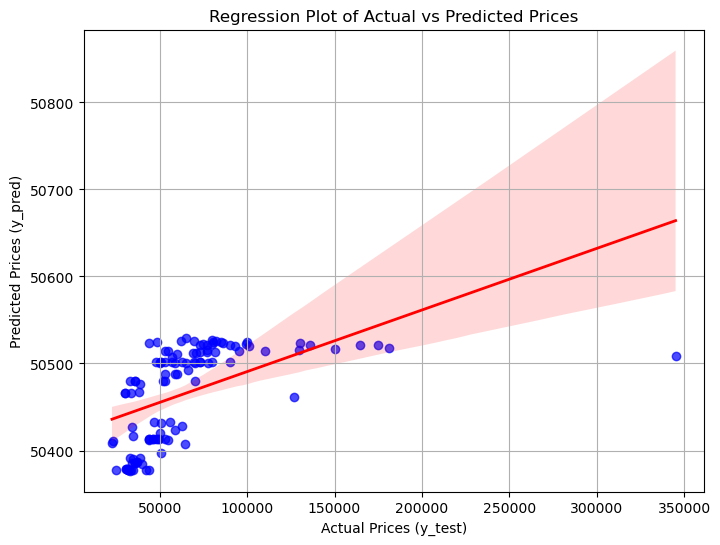

In [44]:
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression 


In [46]:
model4 = LinearRegression()

In [47]:
model4.fit(x_train  , y_train)

LinearRegression()

In [48]:
y_pred = model4.predict(x_test)

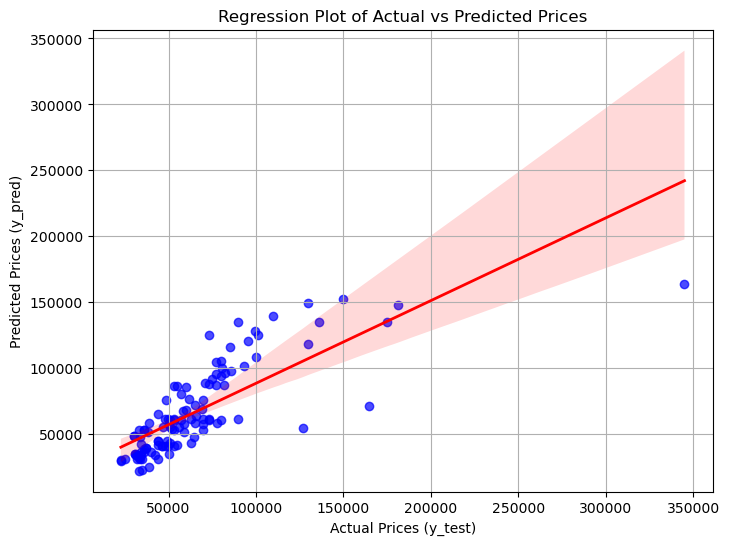

In [49]:
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()

In [50]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 661896531.6528611
Mean Absolute Error: 15042.630728312355
R-squared Score: 0.6029299127101786


In [51]:
from xgboost import XGBRegressor

In [52]:
model5 = XGBRegressor()

In [53]:
model5.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred = model5.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 289599715.1037101
Mean Absolute Error: 11082.321734512061
R-squared Score: 0.8262698650360107


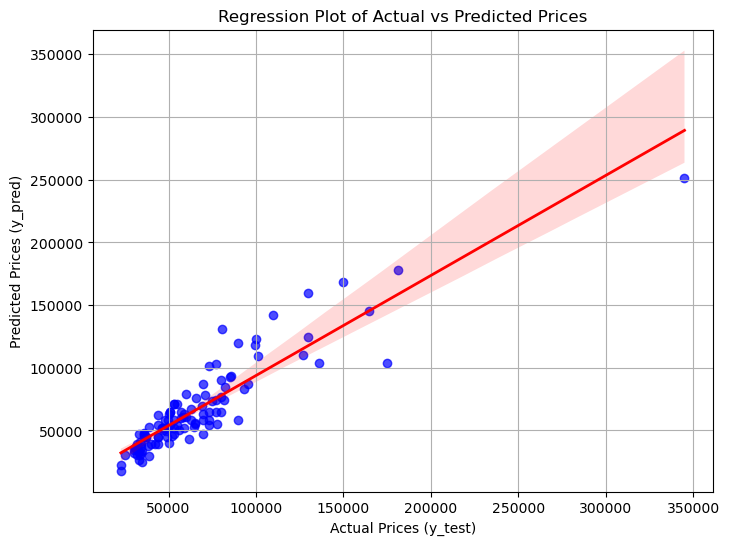

In [56]:
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()

In [57]:
from sklearn.linear_model import Ridge

In [58]:
model6 = Ridge(alpha=1.0)

In [59]:
model6.fit(x_train , y_train)

Ridge()

In [60]:
y_pred = model6.predict(x_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 661896531.653475
Mean Absolute Error: 15042.630728281883
R-squared Score: 0.6029299127098102


In [62]:
from sklearn.linear_model import Lasso

In [63]:
model7 = Lasso(alpha=0.1)

In [64]:
model7.fit(x_train , y_train )

Lasso(alpha=0.1)

In [65]:
y_pred = model7.predict(x_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 661896531.8064843
Mean Absolute Error: 15042.630725759414
R-squared Score: 0.6029299126180203


In [67]:
from sklearn.linear_model import ElasticNet

In [68]:
model8 = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [69]:
model8.fit(x_train , y_train)

ElasticNet(alpha=0.1)

In [70]:
y_pred = model8.predict(x_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 661896531.7414025
Mean Absolute Error: 15042.630726319541
R-squared Score: 0.6029299126570627


In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
model9 = KNeighborsRegressor(n_neighbors=3) 

In [74]:
model9.fit(x_train , y_train )

KNeighborsRegressor(n_neighbors=3)

In [75]:
y_pred = model9.predict(x_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 340108055.80506825
Mean Absolute Error: 11567.152046783627
R-squared Score: 0.7959700210707303


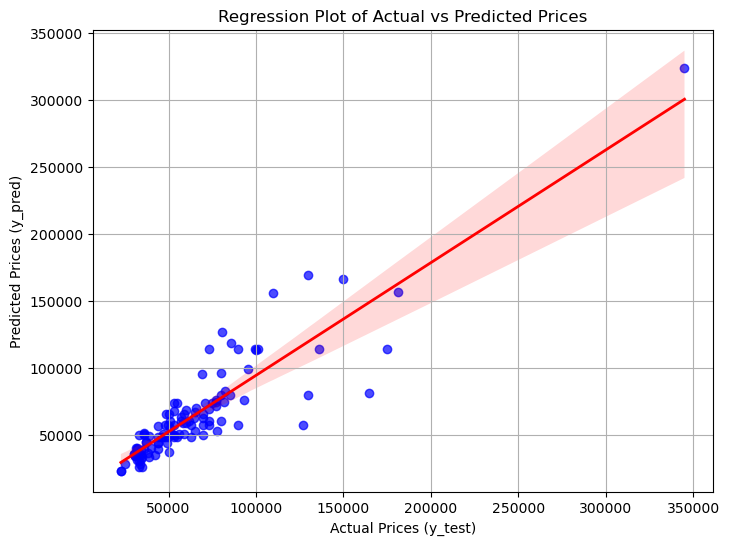

In [77]:
y_test_sorted = y_test.reset_index(drop=True)

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_sorted, y=y_pred, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Labels and Title
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.grid(True)
plt.show()

In [78]:
import pickle

In [79]:
with open('laptop_model.pkl' , 'wb') as f:
    pickle.dump((model2 , label_encoders), f)